In [1]:
# Constants
TRAIN_FRACTION = 0.7
RANDOM_SEED = 86720

In [2]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [4]:
train_df = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)
train_x_df = train_df.iloc[:,:8].values
train_y_df = train_df.iloc[:,8].values

test_df = df.drop(index=train_df.index)
test_x_df = test_df.iloc[:,:8].values
test_y_df = test_df.iloc[:,8].values

In [5]:

max_depth=20
criterion='entropy'
class_weight=None
records=[]
for depth in range(1,max_depth+1):

    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth,class_weight=class_weight)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED,num_rounds=50)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    records.append([depth,avg_expected_loss,avg_bias,avg_var])

dbv=pd.DataFrame.from_records(records,columns=['Depth','Loss','BIAS','VARIANCE'])
dbv.to_csv('DepthBiasVariance.csv',index=False)
    

Average expected loss: 0.264
Average bias: 0.239
Average variance: 0.136
Average expected loss: 0.226
Average bias: 0.196
Average variance: 0.111
Average expected loss: 0.231
Average bias: 0.200
Average variance: 0.121
Average expected loss: 0.241
Average bias: 0.196
Average variance: 0.157
Average expected loss: 0.242
Average bias: 0.183
Average variance: 0.167
Average expected loss: 0.252
Average bias: 0.191
Average variance: 0.185
Average expected loss: 0.260
Average bias: 0.174
Average variance: 0.194
Average expected loss: 0.269
Average bias: 0.170
Average variance: 0.206
Average expected loss: 0.276
Average bias: 0.187
Average variance: 0.210
Average expected loss: 0.280
Average bias: 0.187
Average variance: 0.211
Average expected loss: 0.277
Average bias: 0.187
Average variance: 0.206
Average expected loss: 0.281
Average bias: 0.187
Average variance: 0.209
Average expected loss: 0.281
Average bias: 0.178
Average variance: 0.210
Average expected loss: 0.282
Average bias: 0.200
Av

Accuracy - 74.34782608695653
Recall - 69.6969696969697
Precision - 54.11764705882353
FPR - 23.78048780487805


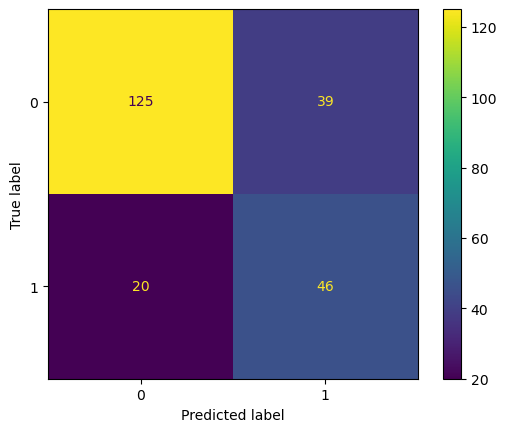

In [36]:
dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=2,class_weight=class_weight)
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
proba_test_y = dtree.predict_proba(test_x_df)

Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))
print(f"Accuracy - {Accuracy}")
print(f"Recall - {Recall}")
print(f"Precision - {Precision}")
print(f"FPR - {FPR}")
metrics.ConfusionMatrixDisplay.from_predictions(test_y_df,pred_test_y)

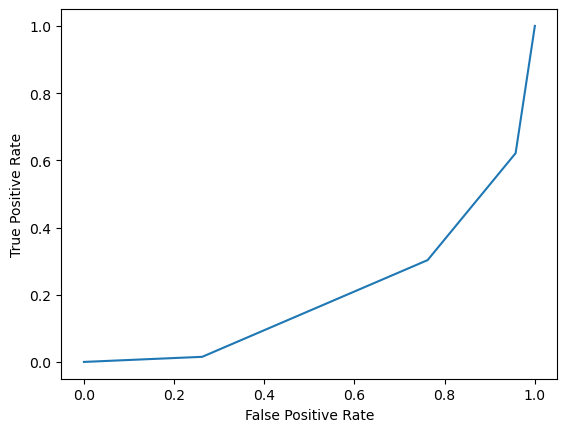

In [44]:
fpr,tpr,_ = metrics.roc_curve(test_y_df, proba_test_y[:,0],pos_label=1)
rocDisplay = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

In [41]:
proba_test_y

array([[0.62128911, 0.37871089],
       [0.12280953, 0.87719047],
       [0.4046225 , 0.5953775 ],
       [0.12280953, 0.87719047],
       [0.97963143, 0.02036857],
       [0.4046225 , 0.5953775 ],
       [0.62128911, 0.37871089],
       [0.62128911, 0.37871089],
       [0.62128911, 0.37871089],
       [0.12280953, 0.87719047],
       [0.97963143, 0.02036857],
       [0.12280953, 0.87719047],
       [0.62128911, 0.37871089],
       [0.62128911, 0.37871089],
       [0.97963143, 0.02036857],
       [0.97963143, 0.02036857],
       [0.62128911, 0.37871089],
       [0.97963143, 0.02036857],
       [0.62128911, 0.37871089],
       [0.62128911, 0.37871089],
       [0.4046225 , 0.5953775 ],
       [0.62128911, 0.37871089],
       [0.62128911, 0.37871089],
       [0.4046225 , 0.5953775 ],
       [0.62128911, 0.37871089],
       [0.12280953, 0.87719047],
       [0.4046225 , 0.5953775 ],
       [0.62128911, 0.37871089],
       [0.4046225 , 0.5953775 ],
       [0.62128911, 0.37871089],
       [0.

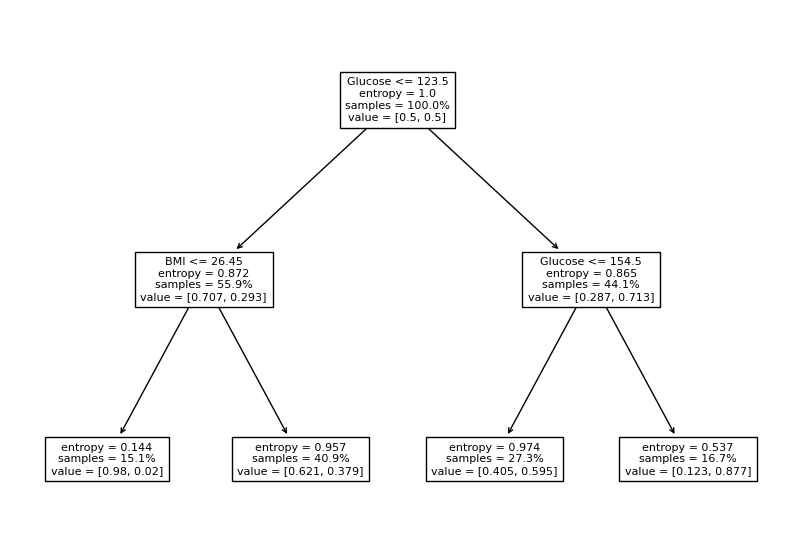

In [32]:
plt.figure(figsize=[10,7])
txt=tree.plot_tree(dtree,fontsize=8,proportion=True)
for tx in txt:
    tx.set_text(tx.get_text().replace('x[1]',train_df.columns[1]))
    tx.set_text(tx.get_text().replace('x[5]',train_df.columns[5]))
plt.show()

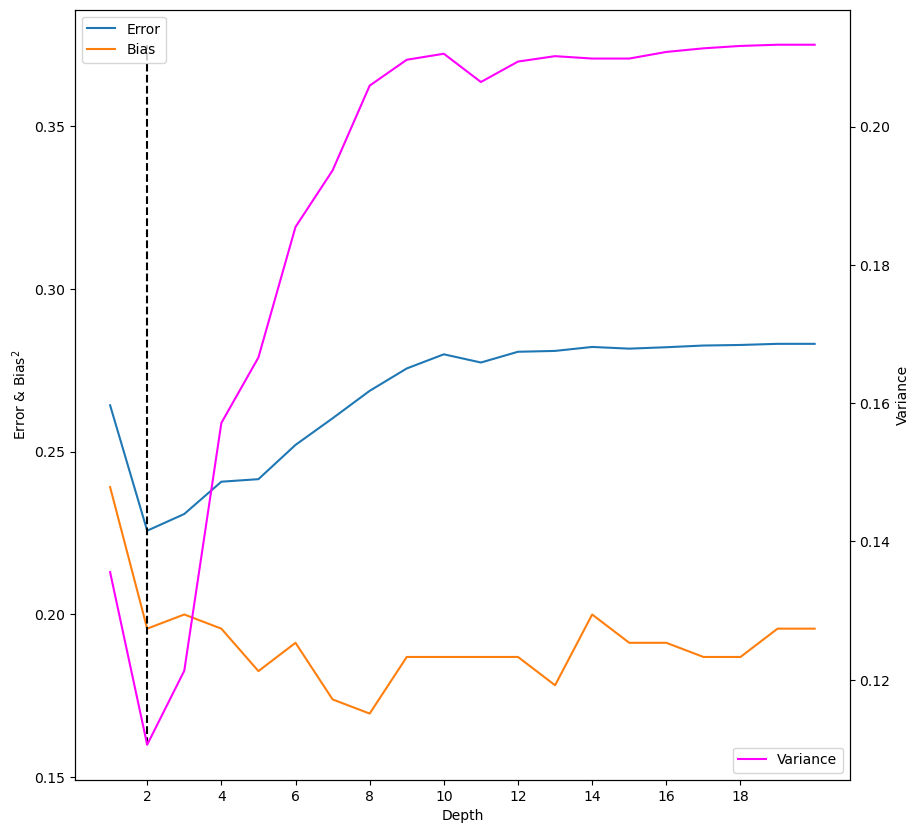

In [8]:
max_depth=20
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,1])
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,2])
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=2,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
plt.show()

In [ ]:
metrics.

In [9]:

max_depth=20
criterion='entropy'
class_weight='balanced'
records=[]
for depth in range(1,max_depth+1):

    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth,class_weight=class_weight)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED,num_rounds=50)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    records.append([depth,avg_expected_loss,avg_bias,avg_var])

dbv=pd.DataFrame.from_records(records,columns=['Depth','Loss','BIAS','VARIANCE'])
dbv.to_csv('DepthBiasVariance_balanced.csv',index=False)

Average expected loss: 0.286
Average bias: 0.257
Average variance: 0.144
Average expected loss: 0.273
Average bias: 0.217
Average variance: 0.149
Average expected loss: 0.308
Average bias: 0.283
Average variance: 0.153
Average expected loss: 0.275
Average bias: 0.213
Average variance: 0.159
Average expected loss: 0.271
Average bias: 0.213
Average variance: 0.158
Average expected loss: 0.281
Average bias: 0.204
Average variance: 0.185
Average expected loss: 0.284
Average bias: 0.209
Average variance: 0.194
Average expected loss: 0.285
Average bias: 0.200
Average variance: 0.205
Average expected loss: 0.286
Average bias: 0.200
Average variance: 0.209
Average expected loss: 0.289
Average bias: 0.200
Average variance: 0.211
Average expected loss: 0.283
Average bias: 0.174
Average variance: 0.209
Average expected loss: 0.283
Average bias: 0.183
Average variance: 0.209
Average expected loss: 0.284
Average bias: 0.187
Average variance: 0.210
Average expected loss: 0.286
Average bias: 0.191
Av

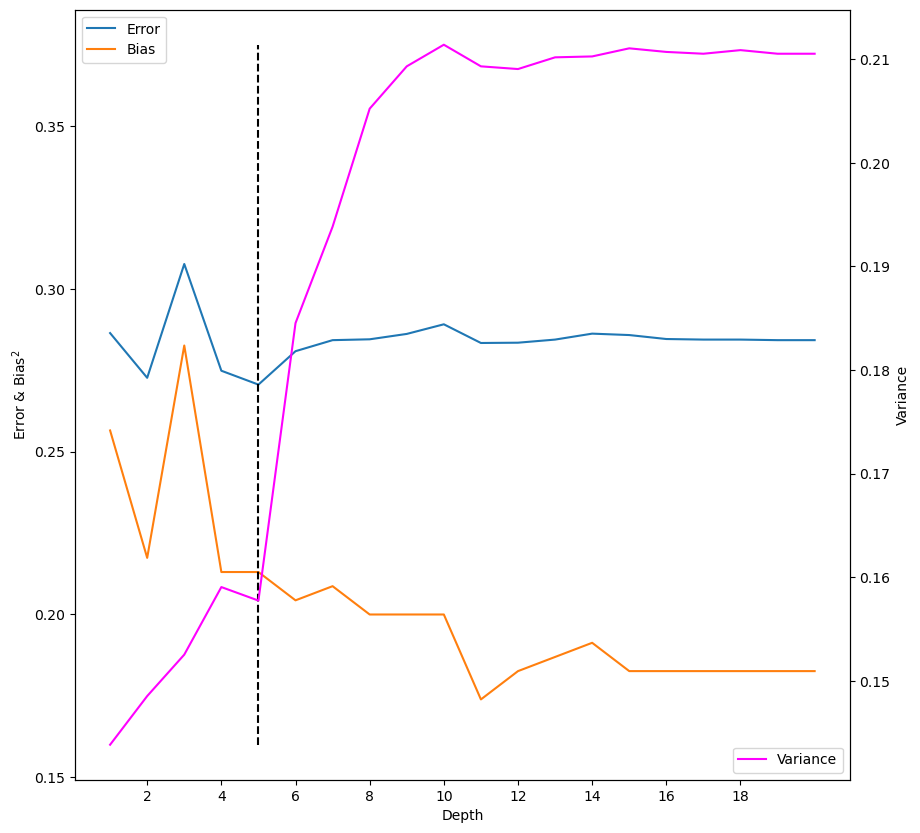

In [10]:
max_depth=20
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,1])
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,2])
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=5,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
plt.show()

Accuracy - 72.17391304347827
Recall - 78.78787878787878
Precision - 50.98039215686274
FPR - 30.487804878048784


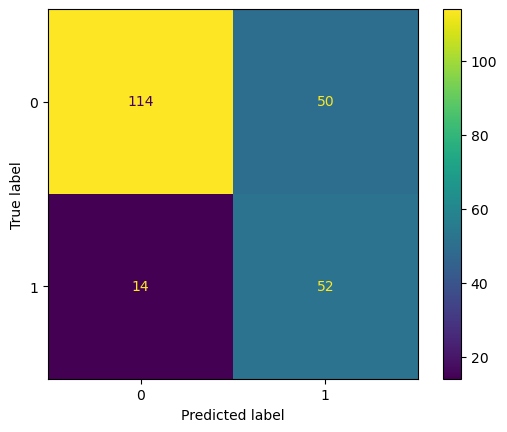

In [33]:
dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=5,class_weight=class_weight)
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))
print(f"Accuracy - {Accuracy}")
print(f"Recall - {Recall}")
print(f"Precision - {Precision}")
print(f"FPR - {FPR}")
metrics.ConfusionMatrixDisplay.from_predictions(test_y_df,pred_test_y)